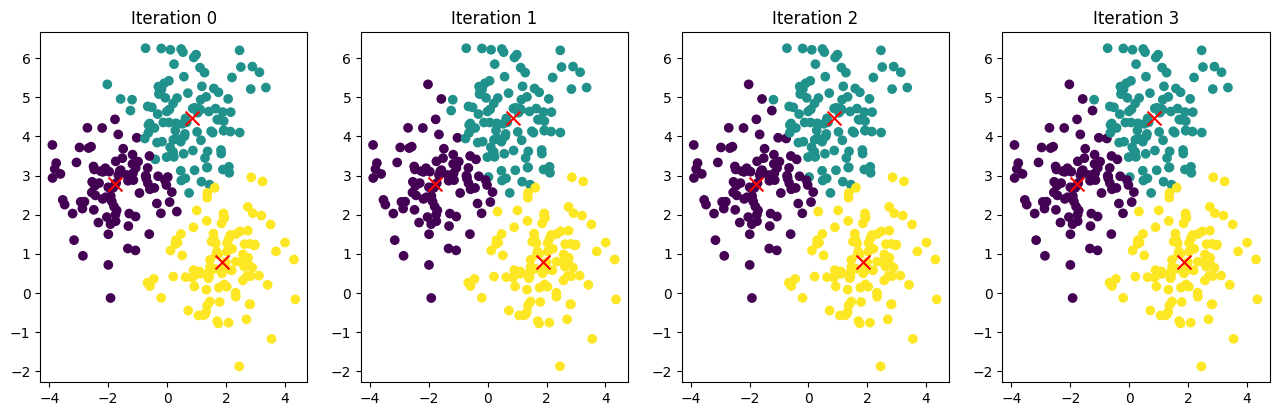

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
    
class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.centroids = None

    def initialize_centroids(self, X):
        n_samples, n_features = X.shape
        centroids = np.zeros((self.n_clusters, n_features))
        for i in range(self.n_clusters):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

    def cluster_points(self, X, centroids):
        clusters = [[] for _ in range(self.n_clusters)]
        for idx, sample in enumerate(X):
            distances = [euclidean_distance(sample, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(idx)
        return clusters

    def compute_centroids(self, X, clusters):
        n_features = X.shape[1]
        centroids = np.zeros((self.n_clusters, n_features))
        for idx, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = centroid
        return centroids

    def predict(self, X):
        centroids = self.initialize_centroids(X)
        all_cluster_assignments = []

        for _ in range(self.max_iters):
            clusters = self.cluster_points(X, centroids)
            prev_centroids = centroids
            centroids = self.compute_centroids(X, clusters)

            # If centroids didn't change, we have converged
            if np.allclose(prev_centroids, centroids):
                break

            # Store the current cluster assignments
            cluster_assignments = np.zeros(len(X))
            for cluster_idx, cluster in enumerate(clusters):
                for sample_idx in cluster:
                    cluster_assignments[sample_idx] = cluster_idx
            all_cluster_assignments.append(cluster_assignments)

            # Update the centroids
            self.centroids = centroids

        # Return the final cluster assignments and all intermediate cluster assignments
        return all_cluster_assignments + [cluster_assignments]

X, y = make_blobs(n_samples=300, centers=3, cluster_std=1, random_state=0)

kmeans = KMeans(n_clusters=3, max_iters=150)
cluster_assignments = kmeans.predict(X)

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i, ax in enumerate(axs.flatten()):
    if i < len(cluster_assignments):
        ax.scatter(X[:, 0], X[:, 1], c=cluster_assignments[i])
        ax.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=100, marker='x', c='r')
        ax.set_title(f"Iteration {i}")
    else:
        ax.set_visible(False)

plt.show()